In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from scipy.optimize import newton

In [2]:
def df(f, x, h=1e-6):
    return (f(x+h) - f(x))/h

def newt_iterator(f, z):
    return z - f(z)/df(f, z)

def newt(f, z0, n):
    z = [z0]
    for i in range(n):
        z.append(newt_iterator(f, z[-1]))
    return z

In [3]:
def is_root_there(roots, new_root):
    for root in roots:
        if abs(root - new_root) < 1e-6:
            return True
    return False

adding root:  (1-8.376823514343316e-251j)
adding root:  (-0.5+0.8660254037844387j)


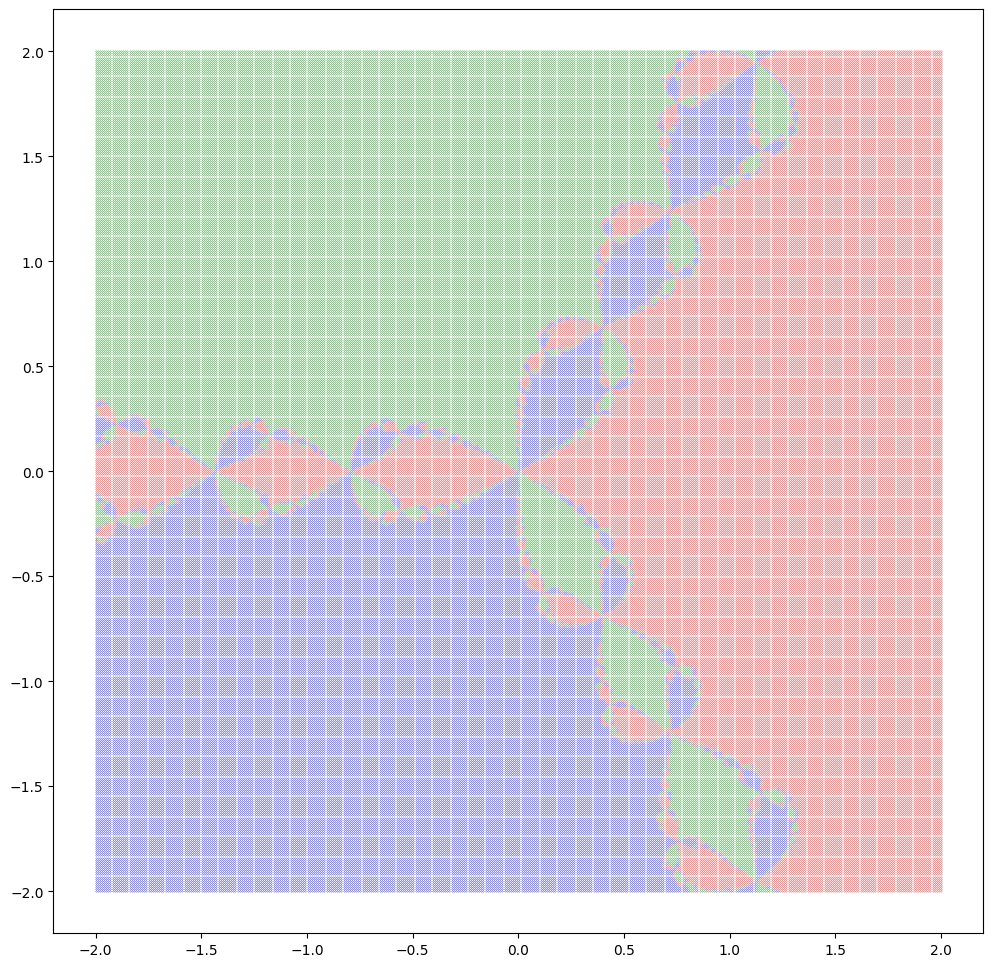

In [70]:
def f(z):
        return z**3 - 1

xs = np.linspace(-2,2,400)
ys = np.linspace(-2,2,400)

roots = {}

colors = ['r', 'g', 'b']
plt.figure(figsize=(12,12))
for x,y in it.product(xs,ys):
    z = x + 1j*y

    z0 = newt(f, z, 60)[-1]

    if len(roots) == 0:
        roots[z0] = colors[len(roots)-1]
        plt.plot(x, y, '.', color=roots[z0], markersize=0.4)
        continue

    for root, color in roots.items():
        if abs(root - z0) < 1e-6 and len(roots) != 0:
            plt.plot(x, y, '.', color=color, markersize=0.4)
            break
    else:
        print('adding root: ', z0)
        roots[z0] = colors[len(roots)-1]
        plt.plot(x, y, '.', color=roots[z0], markersize=0.6)
    


In [7]:
roots

{(-0.5-0.8660254037844386j): 'r', (1+0j): 'r', (-0.5+0.8660254037844387j): 'g'}

try to improve this.

1. the is root there function is not being used but could possibly simplify the main loop.

2. can you find a better way to do the main loop? my code is not optimized and i will try to improve it.

In [13]:
from collections import defaultdict

In [14]:
def f(z):
    return z**n + c

$$z_{n+1} = z_{n}^2 + c$$

In [66]:
def f(z, c):
    return z**2 + c

def run(f, c):
    zs = [0, c]
    for i in range(100):
        if abs(zs[-1]- zs[-2]) < 1e-8:
            return i
        zs.append(f(zs[-1], c))
    return i

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_18919/1668926259.py:2: RuntimeWarning: overflow encountered in scalar power
  return z**2 + c
/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_18919/1668926259.py:2: RuntimeWarning: invalid value encountered in scalar power
  return z**2 + c
/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_18919/1668926259.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(zs[-1]- zs[-2]) < 1e-8:


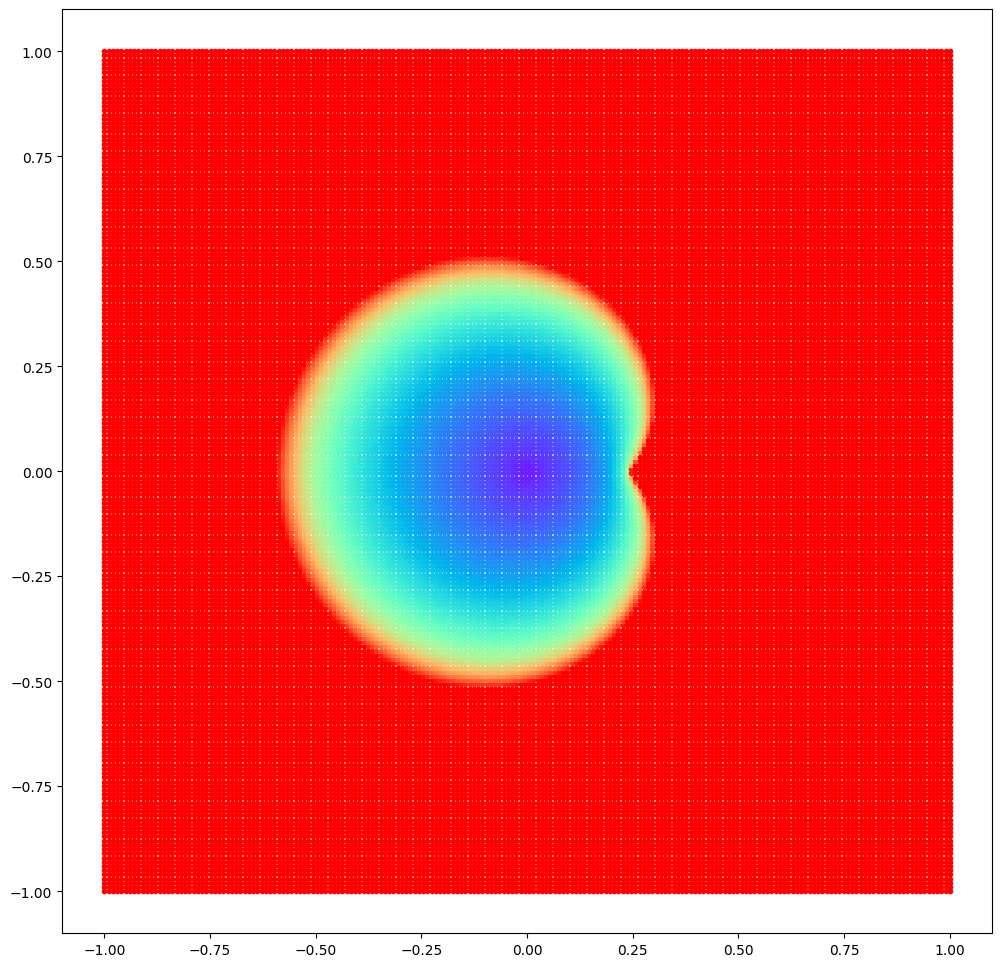

In [69]:

xs = np.linspace(-1,1,200)
ys = np.linspace(-1,1,200)

dat = dict()
colors = plt.cm.rainbow(np.linspace(0,1,100))
plt.figure(figsize=(12,12))
for x,y in it.product(xs, ys):
    z = x + 1j*y
    i = run(f, z)
    plt.plot(x, y, '.', color=colors[i])

    